In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv")
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [ ]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
df.tail()

,Consumption
Date,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [ ]:
from datetime import datetime
def plot_series(series):
  plt.figure(figsize=(10, 6)) #(width,height)
  plt.xlabel("Year", fontweight='bold')
  plt.ylabel("Consumption", fontweight='bold')
  plt.title("Original Time Series")
  plt.plot(series)
  '''
  for year in range(1985, 2019):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
  '''
  plt.show()

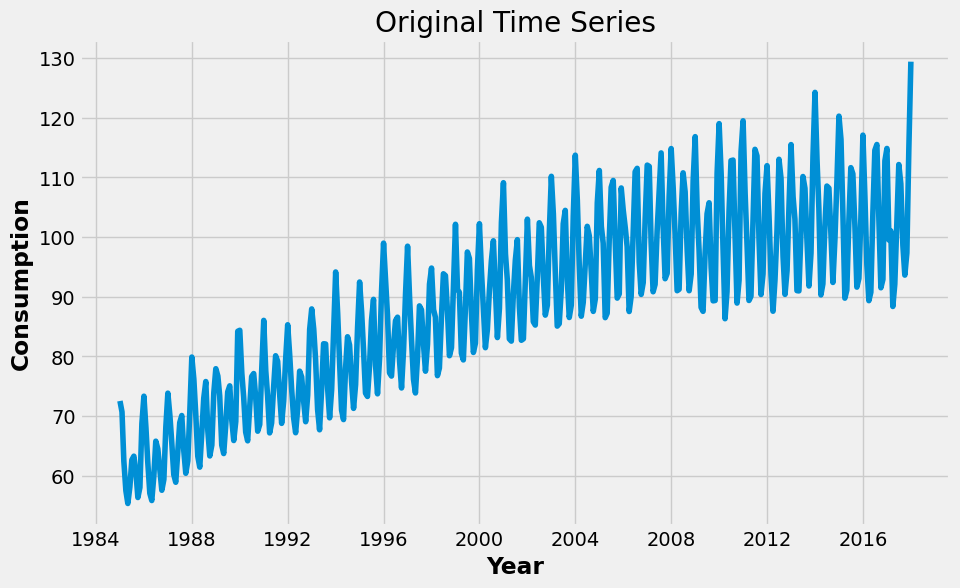

In [ ]:
plot_series(df)

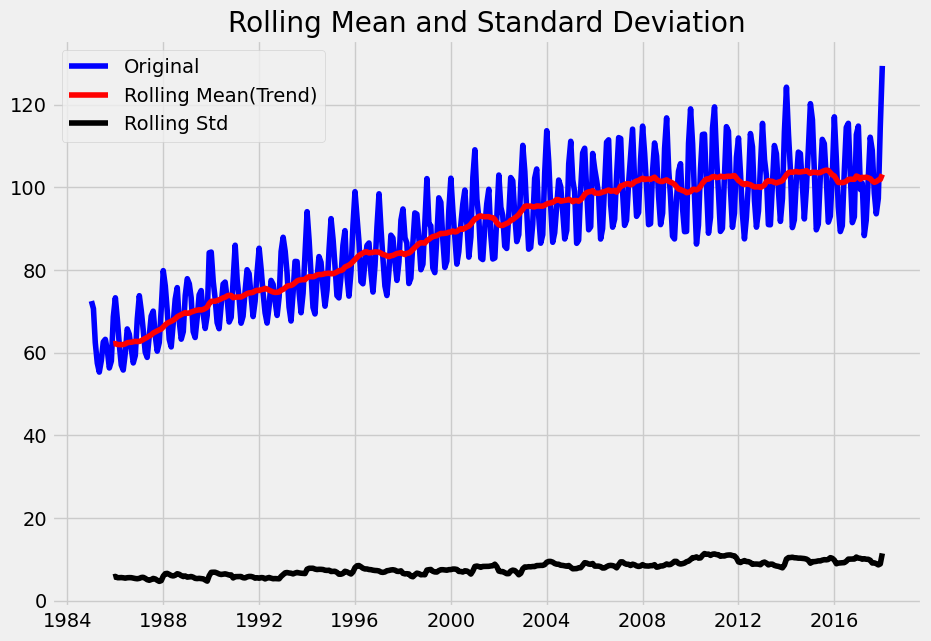

In [ ]:
def test(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean(Trend)')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)


test(df)

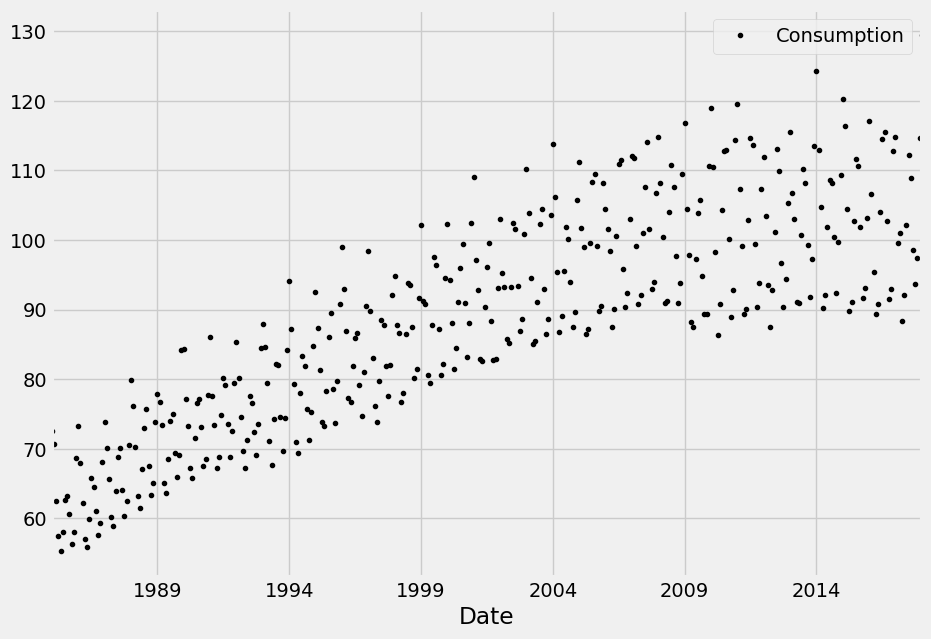

In [ ]:
df.plot(style='k.')
plt.show()

<Axes: ylabel='Density'>

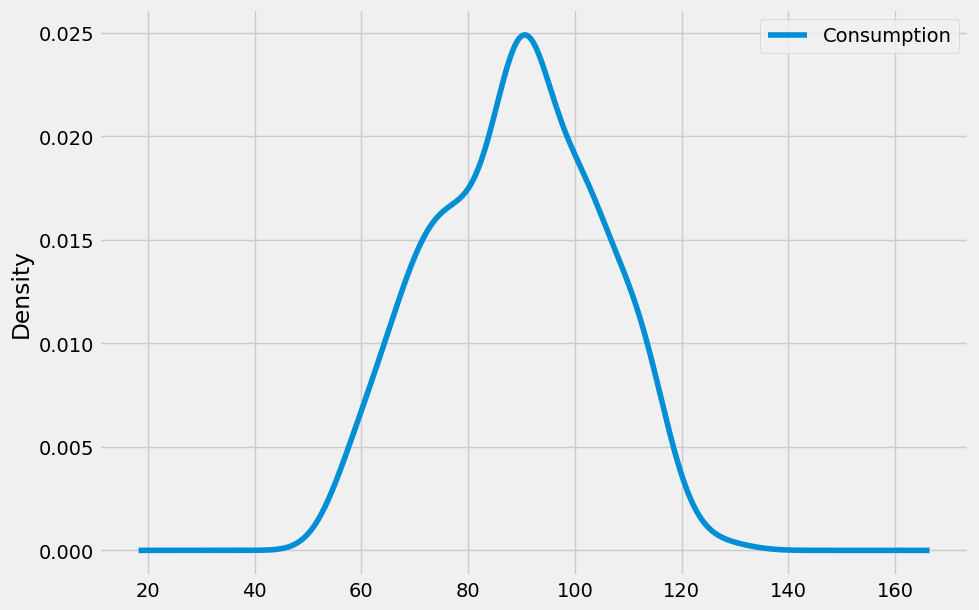

In [ ]:
df.plot(kind='kde')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

In [ ]:
print(adfuller(df))

(-2.256990350047235, 0.1862146911658712, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)


adf stat: more -ve, more good(indication of stationarity)
p-value: < 0.05 will work for stationarity
no of lags used
no of observations
critical values  
residual sum of squares


However, the p-value is not directly related to the magnitude of the deviation. Instead, it tells you the probability of observing an equally or more extreme value under the assumption that the null hypothesis is true.
Therefore, a lower p-value (closer to 0) indicates that observing such an extreme deviation is less likely to happen by chance if the null hypothesis were true. This lower p-value provides stronger evidence to reject the null hypothesis.

This probability reflects how likely it would be to observe a result as extreme (or even more extreme) as the one you obtained, assuming the null hypothesis (H₀) is actually true.

a low p-value (like 0.01 in your example) signifies that observing such an extreme test statistic is unlikely to happen by chance alone if the null hypothesis were true.

Low p-value, ADF Statistic below Critical Values:

A p-value less than 0.05 and an ADF Statistic more negative than the critical values indicate strong evidence for stationarity. The series is likely stationary.
Low p-value, ADF Statistic above Critical Values:

A low p-value but an ADF Statistic above the critical values may suggest weak evidence for stationarity. Further investigation is needed.
High p-value, ADF Statistic below Critical Values:

A high p-value (> 0.05) but an ADF Statistic below the critical values may still suggest evidence for stationarity. The series could be stationary.
High p-value, ADF Statistic above Critical Values:

A high p-value and an ADF Statistic above the critical values suggest weak evidence for stationarity. The series may not be stationary.

While some practitioners rely solely on the p-value for its simplicity, others prefer a more comprehensive approach considering both the p-value and the ADF Statistic against critical values.

Using the p-value alone can be sufficient, especially when making quick assessments or when the interpretation needs to be straightforward.



removing trend means making mean constant


# Take First Difference to Remove Trend(make Mean constant with Time).

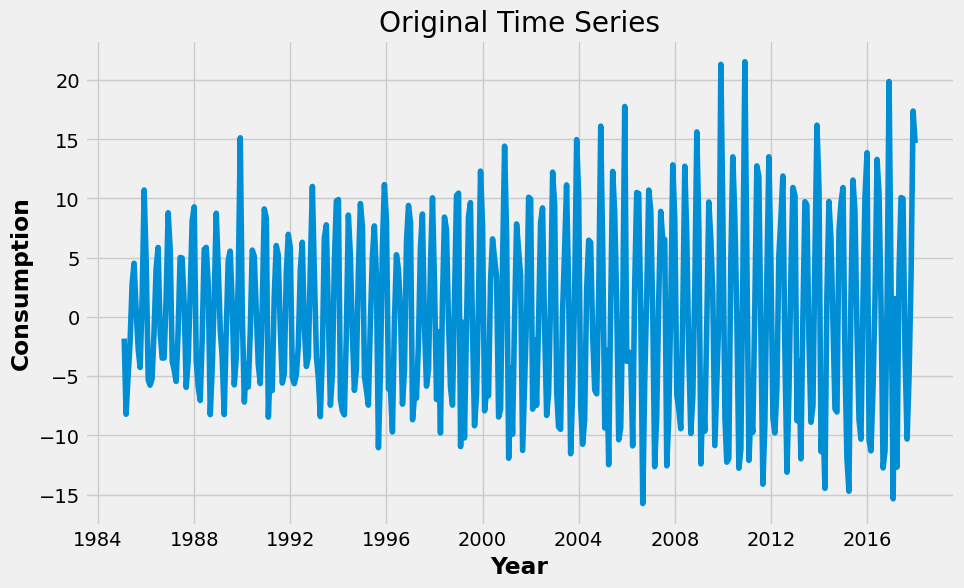

In [ ]:
df_diff= df.diff().dropna()
plot_series(df_diff)

In [ ]:
df_diff.head()

,Consumption
Date,
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
1985-06-01,2.7753


Moving Average (MA) Component:
The MA part of an ARIMA model represents the error terms of the model. It is a weighted sum of the past error terms. The order
�
q determines how many lagged error terms are included in the model.

In [ ]:
adf_test(df_diff)
print(adfuller(df_diff))

ADF Statistic: -7.104891
p-value: 0.000000
(-7.104890882267311, 4.0777865655394095e-10, 14, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.5415092614144)


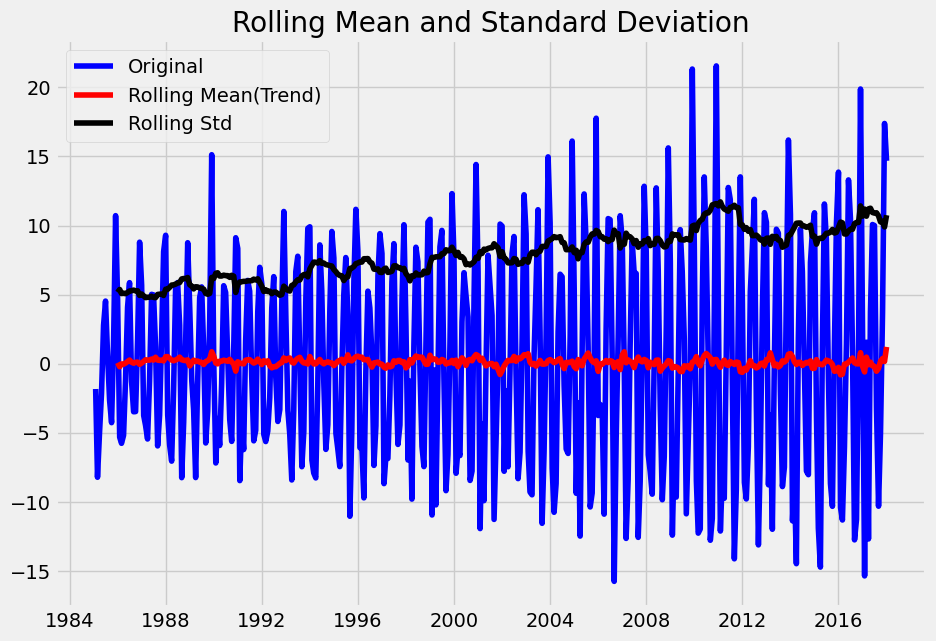

In [ ]:
test(df_diff)

In [ ]:
# Now to make data Stationary we subtract previous value from current till we get p < 0.05
# To find out how many times we need to repeat the above step we use pmdarima
!pip install pmdarima -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
adf_test(df)

ADF Statistic: -2.256990
p-value: 0.186215


Estimate ARIMA differencing term, d.

Perform a test of stationarity for different levels of d to estimate the number of differences required to make a given time series stationary. Will select the maximum value of d for which the time series is judged stationary by the statistical test

In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(df,test = "adf")
print("d value:", d_value)

d value: 0


# Each model has:
## a log likelihood ($l$),
## a number of parameters ($k$),
## a number of samples used for fitting ($n$).
\\
# AIC(Akaike Information Criterion) = 2$k$ - 2$l$
## **Lower AIC via higher log likelihood or less parameters**
\\
# BIC(Bayesian Information Criterion) = $\\ln(n)k$ - 2$l$
##**Lower BIC via higher log likelihood or less parameters or less samples used in fitting**
## **We generally need this when we're comparing two models fitted(trained) with varying amount of samples.**

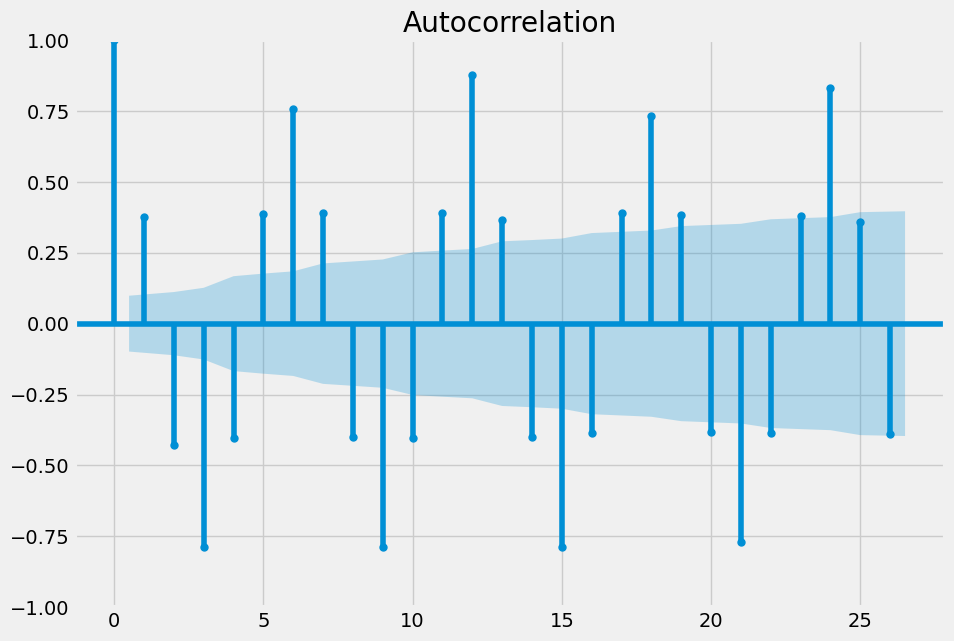

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df_diff)

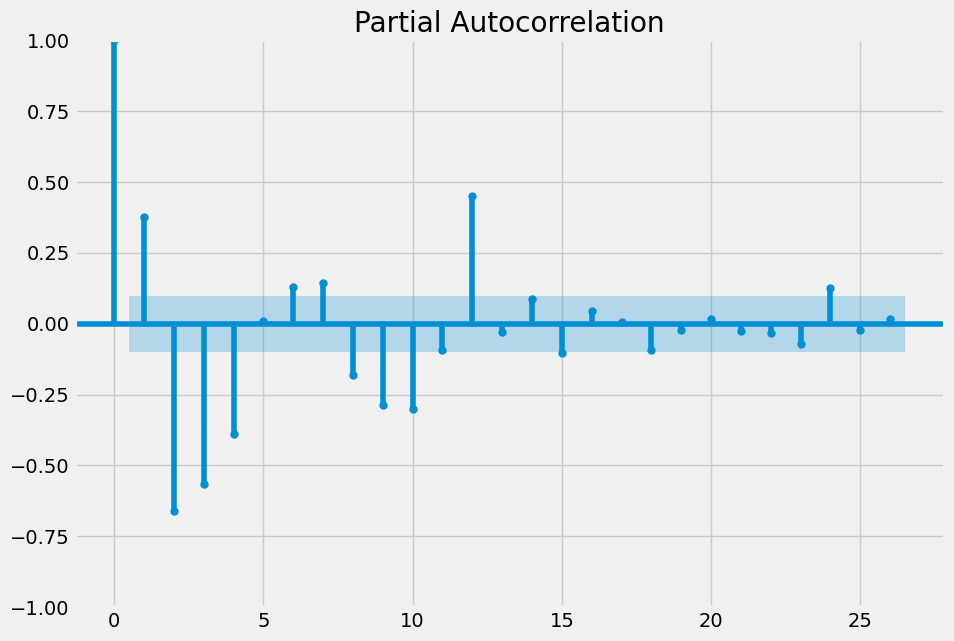

In [ ]:
pacf_plot = plot_pacf(df_diff)

#by inferencing pacf plot, we'll get q paramterer of ARIMA Model

In [ ]:
from pmdarima import auto_arima

In [ ]:
step_fit = auto_arima(df_diff, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2748.185, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2525.517, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2493.119, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.52 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2449.578, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=2431.711, Time=0.72 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.47 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=2359.636, Time=0.75 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=2

In [ ]:

# Train-test split
train_size = int(len(df_diff) * 0.8)
train, test = df_diff[:train_size], df_diff[train_size:]

In [ ]:
df_diff

,Consumption
Date,
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
1985-06-01,2.7753
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import time
import warnings
warnings.filterwarnings('ignore')
start = time.time()

model= ARIMA(train, order=(2,0,4)) # (p,d,q)
result = model.fit()

end = time.time()
elapsed_time = end - start
print("Model Fitting Time:", elapsed_time, "seconds")
print(result.aic)

Model Fitting Time: 2.59545636177063 seconds
1603.7180862274286


In [ ]:
#summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  316
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -819.374
Date:                Tue, 05 Mar 2024   AIC                           1650.747
Time:                        14:39:49   BIC                           1673.282
Sample:                    02-01-1985   HQIC                          1659.750
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.173      0.574      0.566      -0.240       0.439
ar.L1          0.9982      0.002    534.048      0.000       0.995       1.002
ar.L2         -0.9994      0.001   -851.848      0.0

In [ ]:
#get prediction start and end dates
pred_start_date = test.index[0]
pred_end_date = test.index[-1]

In [ ]:
#get the predictions and residuals
predictions = result.predict(start=pred_start_date, end=pred_end_date)
residuals = test - predictions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse= round(sqrt(mean_squared_error(test, predictions)),4)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = round(mean_absolute_error(test, predictions),4)
print("Mean Absolute Error (MAE):", mae)

#Calculate MAPE
test_np= np.array(test)
predictions_np= np.array(predictions)
mape= round(np.mean(abs((predictions_np - test_np)/test_np)),4)
print(f'Mean Absolute Percent Error(MAPE): {mape*100}%')

#Calculate R2 Score
r2= r2_score(test,predictions)
print("R2 Score:",r2)

Root Mean Squared Error (RMSE): 4.2035
Mean Absolute Error (MAE): 3.3643
Mean Absolute Percent Error(MAPE): 419.35%
R2 Score: 0.8039349462116319


In [ ]:
df_recovered = df_diff.cumsum()

# Add the first value of the original series to the recovered data
first_value = df['Consumption'].iloc[0]
df_recovered['Consumption'] = df_recovered['Consumption'] + first_value

# Now df_recovered contains the original data
df_recovered

,Consumption
Date,
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
last_value = df['Consumption'].iloc[train_size]
print(last_value)

90.0698


In [ ]:
test_original = test.cumsum()+ last_value
test_original

,Consumption
Date,
2011-06-01,102.8204
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
# Convert predictions back to original scale
last_value = df['Consumption'].iloc[train_size] #Get the last value of the original series
predictions

2011-06-01    11.833612
2011-07-01     7.000640
2011-08-01    -4.738520
2011-09-01   -11.627096
2011-10-01    -6.771592
                ...    
2017-09-01   -11.421471
2017-10-01    -6.047905
2017-11-01     5.476720
2017-12-01    11.610871
2018-01-01     6.216667
Freq: MS, Name: predicted_mean, Length: 80, dtype: float64

In [ ]:
predictions_original= predictions.cumsum() + last_value
predictions_original

2011-06-01    101.903412
2011-07-01    108.904052
2011-08-01    104.165532
2011-09-01     92.538436
2011-10-01     85.766843
                 ...    
2017-09-01     99.177481
2017-10-01     93.129576
2017-11-01     98.606296
2017-12-01    110.217167
2018-01-01    116.433834
Freq: MS, Name: predicted_mean, Length: 80, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse= round(sqrt(mean_squared_error(test_original, predictions_original)),4)
print("Root Mean Squared Error (RMSE):", rmse)

# print(mean_squared_error(test_original, predictions_original))
# Calculate MAE
mae = round(mean_absolute_error(test_original, predictions_original),4)
print("Mean Absolute Error (MAE):", mae)

#Calculate MAPE
test_np= np.array(test_original)
predictions_np= np.array(predictions_original)
mape= round(np.mean(abs((predictions_np - test_np)/test_np)),4)
print(f'Mean Absolute Percent Error(MAPE): {mape*100}%')

Root Mean Squared Error (RMSE): 4.7735
Mean Absolute Error (MAE): 3.8698
Mean Absolute Percent Error(MAPE): 10.13%


Text(0, 0.5, 'Consumption')

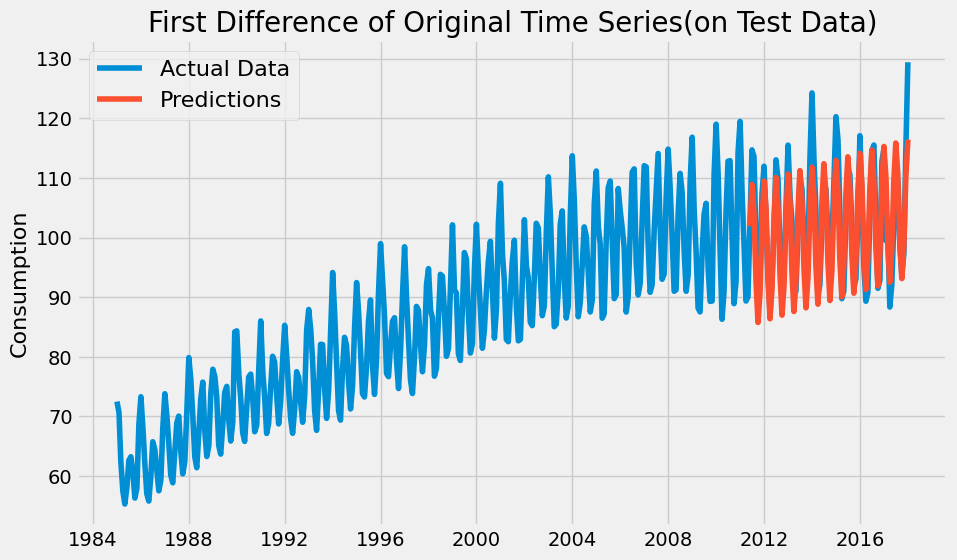

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(df)
plt.plot(predictions_original)

plt.legend(('Actual Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Original Time Series(on Test Data)', fontsize=20)
plt.ylabel('Consumption', fontsize=16)

In [ ]:
# Check predictions_diff and last_value
print("predictions_diff:")
print(predictions)
print("last_value:", last_value)

# Ensure proper index alignment
predictions.index = train.index[-len(predictions_diff):]

# Convert differenced predictions back to original scale
predictions_original = predictions_diff.cumsum() + last_value

print("Predictions in Original Scale:")
print(predictions)

In [ ]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
predictions_ARIMA_diff.head()

2011-06-01    15.101241
2011-07-01    12.137134
2011-08-01    -2.084884
2011-09-01   -13.146845
2011-10-01   -10.918385
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(df_diff['Consumption'].iloc[0], index=df_diff.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

NameError: name 'elecom_log' is not defined

Text(0, 0.5, 'Consumption')

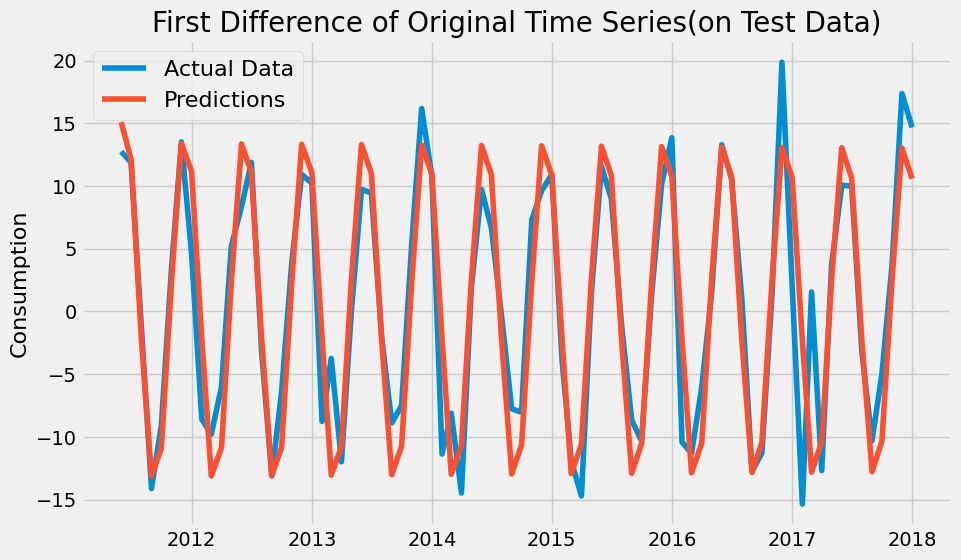

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Actual Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Original Time Series(on Test Data)', fontsize=20)
plt.ylabel('Consumption', fontsize=16)

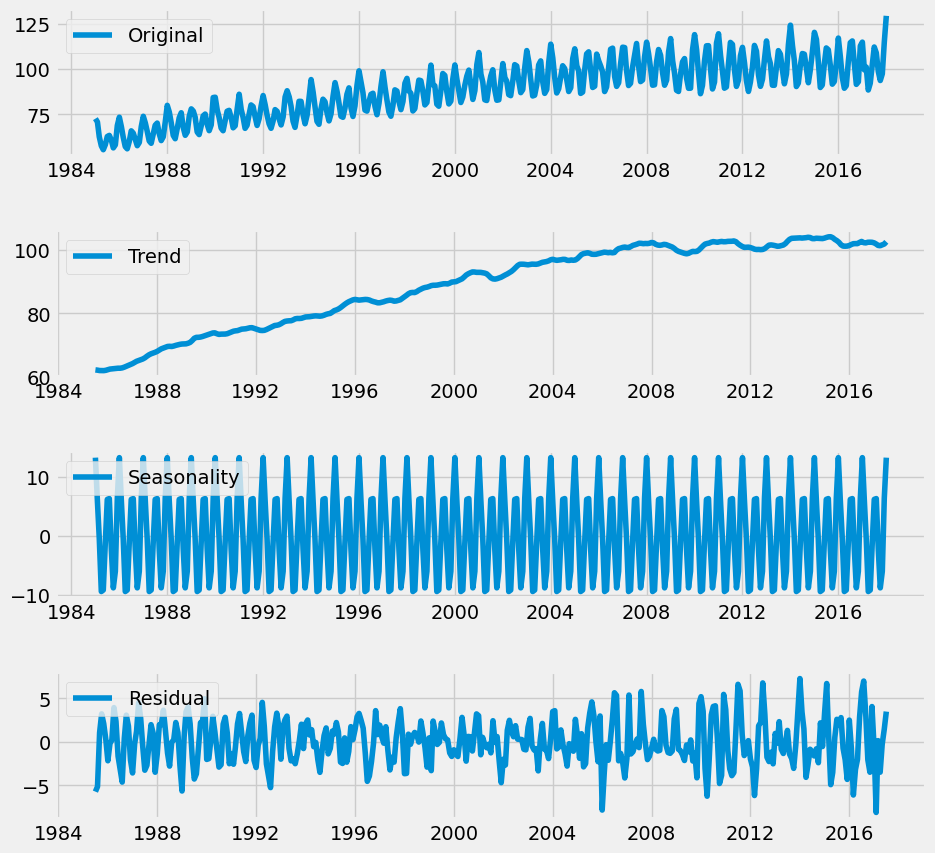

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Consumption'], model='additive')

# Plot the decomposition components
plt.figure(figsize=(10, 10))
plt.subplot(411)
plt.plot(df['Consumption'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=300)